# Training with data from Kaggle New York Taxi data set

In [1]:
#load data 

import pandas as pd
import pickle
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

from sklearn.model_selection import train_test_split

X_total = pickle.load(open('X_Kaggle', 'rb'))
Y_triptime = pickle.load(open('Y_Kaggle_triptime', 'rb'))

In [2]:
traingRecordNumber = len(X_total)
#traingRecordNumber = 100000
X = X_total.as_matrix()[0:traingRecordNumber,:]
print str(len(X))


y = np.log(Y_triptime.tolist()[0:traingRecordNumber])
print str(len(y))

1458644
1458644


In [3]:
X_total.columns

Index([u'passenger_count', u'store_and_fwd_flag_N', u'store_and_fwd_flag_Y',
       u'weekday_0', u'weekday_1', u'weekday_2', u'weekday_3', u'weekday_4',
       u'weekday_5', u'weekday_6',
       ...
       u'dropoffLoc_40', u'dropoffLoc_41', u'dropoffLoc_42', u'dropoffLoc_43',
       u'dropoffLoc_44', u'dropoffLoc_45', u'dropoffLoc_46', u'dropoffLoc_47',
       u'dropoffLoc_48', u'dropoffLoc_49'],
      dtype='object', length=134)

# Trained with XGB

In [6]:


#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(X, y, test_size=0.2, random_state=0)
Xcv,Xv,Zcv,Zv = train_test_split(Xval, Zval, test_size=0.5, random_state=1)
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xcv   , label=Zcv)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

In [10]:
parms = {
         'objective':'reg:linear',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
        'verbose':100}  

#model = xgb.train(parms, data_tr, num_boost_round=1000, evals = evallist,
                 # early_stopping_rounds=30, maximize=False)
    
xgb_model = xgb.XGBRegressor(learning_rate=0.3,
                         objective='reg:linear',
                         subsample=0.8,
                         reg_lambda = 4,
                         colsample_bytree=0.9, 
                         colsample_bylevel=1,
                         verbose=100,
                         n_jobs=-1)

param_grid = {
 'max_depth':range(5,32,2),
 'min_child_weight':range(1,20,2)
}

cv = GridSearchCV(xgb_model, param_grid, cv=2,scoring='neg_mean_squared_error',
                       n_jobs=-1,verbose=100)

cv.fit(X,y)

#print('score = %1.5f, n_boost_round =%d.'%(model.best_score,model.best_iteration))
cv.cv_results_

Fitting 2 folds for each of 140 candidates, totalling 280 fits
[CV] max_depth=5, min_child_weight=1 .................................
[CV] max_depth=5, min_child_weight=1 .................................
[CV] max_depth=5, min_child_weight=3 .................................
[CV] max_depth=5, min_child_weight=3 .................................
[CV] max_depth=5, min_child_weight=5 .................................
[CV] max_depth=5, min_child_weight=5 .................................
[CV] max_depth=5, min_child_weight=7 .................................
[CV] max_depth=5, min_child_weight=7 .................................
[CV] max_depth=5, min_child_weight=9 .................................
[CV] max_depth=5, min_child_weight=9 .................................
[CV] max_depth=5, min_child_weight=11 ................................
[CV] max_depth=5, min_child_weight=11 ................................
[CV] max_depth=5, min_child_weight=13 ................................
[CV] max_depth

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min


[CV]  max_depth=5, min_child_weight=9, score=-0.362063762891, total= 1.0min
[CV] max_depth=7, min_child_weight=7 .................................
[CV]  max_depth=5, min_child_weight=3, score=-0.35610977822, total= 1.1min
[CV] max_depth=7, min_child_weight=7 .................................
[CV]  max_depth=5, min_child_weight=3, score=-0.358353581049, total= 1.1min
[CV] max_depth=7, min_child_weight=9 .................................
[CV]  max_depth=5, min_child_weight=9, score=-0.363875545199, total= 1.1min
[CV] max_depth=7, min_child_weight=9 .................................
[CV]  max_depth=5, min_child_weight=13, score=-0.364440061153, total= 1.1min
[CV] max_depth=7, min_child_weight=11 ................................
[CV]  max_depth=5, min_child_weight=11, score=-0.363572367262, total= 1.1min
[CV]  max_depth=5, min_child_weight=15, score=-0.369330848233, total= 1.1min
[CV] max_depth=7, min_child_weight=11 ................................
[CV] max_depth=7, min_child_weight=13 ..

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.2min


[CV] max_depth=7, min_child_weight=17 ................................
[CV]  max_depth=5, min_child_weight=15, score=-0.357542226159, total= 1.2min
[CV]  max_depth=5, min_child_weight=11, score=-0.352285045817, total= 1.2min
[CV] max_depth=7, min_child_weight=17 ................................
[CV] max_depth=7, min_child_weight=19 ................................
[CV]  max_depth=5, min_child_weight=17, score=-0.367266997174, total= 1.2min
[CV] max_depth=7, min_child_weight=19 ................................
[CV] max_depth=9, min_child_weight=1 .................................
[CV]  max_depth=5, min_child_weight=19, score=-0.369226491503, total= 1.2min
[CV] max_depth=9, min_child_weight=1 .................................
[CV]  max_depth=5, min_child_weight=17, score=-0.358627873183, total= 1.3min
[CV] max_depth=9, min_child_weight=3 .................................
[CV]  max_depth=5, min_child_weight=1, score=-0.364458924567, total= 1.4min
[CV] max_depth=9, min_child_weight=3 .....

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min


[CV]  max_depth=7, min_child_weight=11, score=-0.316101879034, total= 1.4min
[CV] max_depth=9, min_child_weight=9 .................................
[CV]  max_depth=7, min_child_weight=5, score=-0.314231488623, total= 1.6min
[CV] max_depth=9, min_child_weight=9 .................................
[CV]  max_depth=7, min_child_weight=9, score=-0.315873215173, total= 1.5min
[CV] max_depth=9, min_child_weight=11 ................................
[CV]  max_depth=7, min_child_weight=17, score=-0.317027113528, total= 1.4min
[CV] max_depth=9, min_child_weight=11 ................................
[CV]  max_depth=7, min_child_weight=15, score=-0.318495183415, total= 1.4min
[CV] max_depth=9, min_child_weight=13 ................................
[CV]  max_depth=7, min_child_weight=15, score=-0.313220527883, total= 1.4min
[CV]  max_depth=7, min_child_weight=19, score=-0.316235977939, total= 1.4min
[CV] max_depth=9, min_child_weight=13 ................................
[CV]  max_depth=7, min_child_weight=7

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min


[CV] max_depth=11, min_child_weight=1 ................................
[CV]  max_depth=7, min_child_weight=11, score=-0.311806197109, total= 1.7min
[CV] max_depth=11, min_child_weight=1 ................................
[CV]  max_depth=7, min_child_weight=9, score=-0.308598665808, total= 1.8min
[CV] max_depth=11, min_child_weight=3 ................................
[CV]  max_depth=7, min_child_weight=5, score=-0.314469782958, total= 2.0min
[CV] max_depth=11, min_child_weight=3 ................................
[CV]  max_depth=9, min_child_weight=3, score=-0.283104424057, total= 2.2min
[CV] max_depth=11, min_child_weight=5 ................................
[CV]  max_depth=9, min_child_weight=3, score=-0.289061475544, total= 2.4min
[CV] max_depth=11, min_child_weight=5 ................................
[CV]  max_depth=9, min_child_weight=5, score=-0.29092573838, total= 2.1min
[CV] max_depth=11, min_child_weight=7 ................................
[CV]  max_depth=9, min_child_weight=5, score=-0

[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  4.4min


[CV]  max_depth=9, min_child_weight=11, score=-0.289398266192, total= 1.8min
[CV] max_depth=11, min_child_weight=15 ...............................
[CV]  max_depth=9, min_child_weight=1, score=-0.285137548962, total= 3.2min
[CV] max_depth=11, min_child_weight=15 ...............................
[CV]  max_depth=9, min_child_weight=19, score=-0.298588458721, total= 1.8min
[CV] max_depth=11, min_child_weight=17 ...............................
[CV]  max_depth=9, min_child_weight=9, score=-0.284678404799, total= 2.0min
[CV] max_depth=11, min_child_weight=17 ...............................
[CV]  max_depth=9, min_child_weight=19, score=-0.291376454848, total= 1.7min
[CV] max_depth=11, min_child_weight=19 ...............................
[CV]  max_depth=9, min_child_weight=17, score=-0.290680736549, total= 1.9min
[CV] max_depth=11, min_child_weight=19 ...............................
[CV]  max_depth=9, min_child_weight=9, score=-0.288926642568, total= 2.1min
[CV] max_depth=13, min_child_weight=1 

[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  6.2min


[CV]  max_depth=11, min_child_weight=7, score=-0.269908839888, total= 2.5min
[CV] max_depth=13, min_child_weight=9 ................................
[CV]  max_depth=11, min_child_weight=9, score=-0.276539257945, total= 2.5min
[CV] max_depth=13, min_child_weight=11 ...............................
[CV]  max_depth=11, min_child_weight=3, score=-0.271826327815, total= 3.5min
[CV] max_depth=13, min_child_weight=11 ...............................
[CV]  max_depth=11, min_child_weight=17, score=-0.281326214509, total= 2.0min
[CV] max_depth=13, min_child_weight=13 ...............................
[CV]  max_depth=11, min_child_weight=5, score=-0.271938097955, total= 2.9min
[CV] max_depth=13, min_child_weight=13 ...............................
[CV]  max_depth=11, min_child_weight=9, score=-0.269092378742, total= 2.7min
[CV] max_depth=13, min_child_weight=15 ...............................
[CV]  max_depth=11, min_child_weight=15, score=-0.278345918985, total= 2.3min
[CV] max_depth=13, min_child_weig

[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:  7.4min


[CV]  max_depth=13, min_child_weight=3, score=-0.265314477206, total= 3.0min
[CV] max_depth=15, min_child_weight=5 ................................
[CV]  max_depth=13, min_child_weight=1, score=-0.272605420032, total= 3.4min
[CV] max_depth=15, min_child_weight=5 ................................
[CV]  max_depth=13, min_child_weight=5, score=-0.267070549651, total= 3.0min
[CV] max_depth=15, min_child_weight=7 ................................
[CV]  max_depth=13, min_child_weight=3, score=-0.27075840679, total= 3.5min
[CV] max_depth=15, min_child_weight=7 ................................
[CV]  max_depth=13, min_child_weight=1, score=-0.278644183514, total= 3.8min
[CV] max_depth=15, min_child_weight=9 ................................
[CV]  max_depth=13, min_child_weight=11, score=-0.268775346912, total= 2.5min
[CV] max_depth=15, min_child_weight=9 ................................
[CV]  max_depth=13, min_child_weight=7, score=-0.266482983228, total= 3.6min
[CV] max_depth=15, min_child_weight

[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  9.8min


[CV]  max_depth=13, min_child_weight=19, score=-0.27109552397, total= 3.0min
[CV] max_depth=17, min_child_weight=1 ................................
[CV]  max_depth=13, min_child_weight=13, score=-0.264420483651, total= 3.3min
[CV] max_depth=17, min_child_weight=3 ................................
[CV]  max_depth=13, min_child_weight=19, score=-0.265897447059, total= 2.9min
[CV] max_depth=17, min_child_weight=3 ................................
[CV]  max_depth=15, min_child_weight=3, score=-0.270570752819, total= 3.7min
[CV] max_depth=17, min_child_weight=5 ................................
[CV]  max_depth=15, min_child_weight=1, score=-0.280609353644, total= 4.5min
[CV] max_depth=17, min_child_weight=5 ................................
[CV]  max_depth=15, min_child_weight=3, score=-0.265098735289, total= 4.4min
[CV] max_depth=17, min_child_weight=7 ................................
[CV]  max_depth=15, min_child_weight=7, score=-0.260215040179, total= 3.6min
[CV] max_depth=17, min_child_weig

[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed: 12.8min


[CV]  max_depth=15, min_child_weight=13, score=-0.264948342425, total= 3.8min
[CV] max_depth=17, min_child_weight=19 ...............................
[CV]  max_depth=15, min_child_weight=17, score=-0.260993914135, total= 3.5min
[CV] max_depth=17, min_child_weight=19 ...............................
[CV]  max_depth=15, min_child_weight=15, score=-0.266285212855, total= 3.6min
[CV] max_depth=19, min_child_weight=1 ................................
[CV]  max_depth=15, min_child_weight=1, score=-0.27427316697, total= 5.9min
[CV] max_depth=19, min_child_weight=1 ................................
[CV]  max_depth=15, min_child_weight=13, score=-0.258667470925, total= 3.7min
[CV] max_depth=19, min_child_weight=3 ................................
[CV]  max_depth=15, min_child_weight=17, score=-0.267568438351, total= 3.7min
[CV] max_depth=19, min_child_weight=3 ................................
[CV]  max_depth=17, min_child_weight=5, score=-0.267666891131, total= 4.0min
[CV] max_depth=19, min_child_we

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 16.5min


[CV]  max_depth=17, min_child_weight=19, score=-0.26552383703, total= 3.7min
[CV] max_depth=19, min_child_weight=17 ...............................
[CV]  max_depth=17, min_child_weight=3, score=-0.274651055757, total= 6.8min
[CV] max_depth=19, min_child_weight=19 ...............................
[CV]  max_depth=17, min_child_weight=9, score=-0.25814194428, total= 4.7min
[CV]  max_depth=17, min_child_weight=1, score=-0.288488592818, total= 7.1min
[CV] max_depth=19, min_child_weight=19 ...............................
[CV] max_depth=21, min_child_weight=1 ................................
[CV]  max_depth=17, min_child_weight=19, score=-0.259652998852, total= 3.9min
[CV] max_depth=21, min_child_weight=1 ................................
[CV]  max_depth=19, min_child_weight=3, score=-0.2787007633, total= 3.9min
[CV] max_depth=21, min_child_weight=3 ................................
[CV]  max_depth=17, min_child_weight=5, score=-0.263556145729, total= 5.6min
[CV] max_depth=21, min_child_weight=3

[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed: 20.8min


[CV]  max_depth=19, min_child_weight=19, score=-0.265242269354, total= 3.9min
[CV] max_depth=21, min_child_weight=17 ...............................
[CV]  max_depth=19, min_child_weight=1, score=-0.290156941888, total= 7.6min
[CV] max_depth=21, min_child_weight=17 ...............................
[CV]  max_depth=19, min_child_weight=17, score=-0.26150537833, total= 4.3min
[CV] max_depth=21, min_child_weight=19 ...............................
[CV]  max_depth=19, min_child_weight=15, score=-0.26331045515, total= 4.6min
[CV] max_depth=21, min_child_weight=19 ...............................
[CV]  max_depth=19, min_child_weight=19, score=-0.258091931691, total= 4.3min
[CV] max_depth=23, min_child_weight=1 ................................
[CV]  max_depth=19, min_child_weight=15, score=-0.257567668706, total= 4.9min
[CV] max_depth=23, min_child_weight=1 ................................
[CV]  max_depth=19, min_child_weight=9, score=-0.264428118666, total= 5.8min
[CV] max_depth=23, min_child_wei

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 25.7min


[CV]  max_depth=21, min_child_weight=1, score=-0.301932025289, total= 8.7min
[CV] max_depth=23, min_child_weight=17 ...............................
[CV]  max_depth=21, min_child_weight=13, score=-0.262440020046, total= 5.4min
[CV] max_depth=23, min_child_weight=19 ...............................
[CV]  max_depth=21, min_child_weight=11, score=-0.258078901485, total= 5.4min
[CV] max_depth=23, min_child_weight=19 ...............................
[CV]  max_depth=21, min_child_weight=17, score=-0.262711631028, total= 5.1min
[CV] max_depth=25, min_child_weight=1 ................................
[CV]  max_depth=21, min_child_weight=19, score=-0.263760894975, total= 5.2min
[CV] max_depth=25, min_child_weight=1 ................................
[CV]  max_depth=21, min_child_weight=9, score=-0.265009976003, total= 6.3min
[CV] max_depth=25, min_child_weight=3 ................................
[CV]  max_depth=21, min_child_weight=19, score=-0.258198710901, total= 5.7min
[CV] max_depth=25, min_child_w

[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed: 31.3min


[CV]  max_depth=23, min_child_weight=17, score=-0.262806961236, total= 5.5min
[CV] max_depth=25, min_child_weight=19 ...............................
[CV]  max_depth=23, min_child_weight=13, score=-0.262427636506, total= 6.4min
[CV] max_depth=25, min_child_weight=19 ...............................
[CV]  max_depth=23, min_child_weight=17, score=-0.255767282093, total= 5.6min
[CV] max_depth=27, min_child_weight=1 ................................
[CV]  max_depth=23, min_child_weight=19, score=-0.262796342451, total= 5.9min
[CV] max_depth=27, min_child_weight=1 ................................
[CV]  max_depth=23, min_child_weight=19, score=-0.258109685027, total= 6.0min
[CV] max_depth=27, min_child_weight=3 ................................
[CV]  max_depth=23, min_child_weight=1, score=-0.30708468997, total=12.0min
[CV] max_depth=27, min_child_weight=3 ................................
[CV]  max_depth=25, min_child_weight=9, score=-0.266601522454, total= 5.0min
[CV] max_depth=27, min_child_we

[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed: 37.4min


[CV]  max_depth=25, min_child_weight=17, score=-0.256327292532, total= 6.2min
[CV] max_depth=29, min_child_weight=1 ................................
[CV]  max_depth=25, min_child_weight=11, score=-0.26404189521, total= 7.2min
[CV] max_depth=29, min_child_weight=3 ................................
[CV]  max_depth=25, min_child_weight=1, score=-0.312373636241, total=12.0min
[CV] max_depth=29, min_child_weight=3 ................................
[CV]  max_depth=27, min_child_weight=1, score=-0.3231168789, total= 8.2min
[CV] max_depth=29, min_child_weight=5 ................................
[CV]  max_depth=27, min_child_weight=3, score=-0.292077289478, total= 8.5min
[CV] max_depth=29, min_child_weight=5 ................................
[CV]  max_depth=27, min_child_weight=7, score=-0.267942172902, total= 5.7min
[CV] max_depth=29, min_child_weight=7 ................................
[CV]  max_depth=27, min_child_weight=7, score=-0.272034816203, total= 6.6min
[CV] max_depth=29, min_child_weight=

[Parallel(n_jobs=-1)]: Done 262 out of 280 | elapsed: 55.2min remaining:  3.8min


[CV]  max_depth=31, min_child_weight=7, score=-0.272058816503, total= 7.1min
[CV]  max_depth=31, min_child_weight=9, score=-0.264654812458, total= 6.2min
[CV]  max_depth=31, min_child_weight=13, score=-0.259544542186, total= 5.8min
[CV]  max_depth=31, min_child_weight=19, score=-0.264201741197, total= 5.4min
[CV]  max_depth=31, min_child_weight=17, score=-0.264051640716, total= 5.6min
[CV]  max_depth=31, min_child_weight=9, score=-0.269278462521, total= 6.8min
[CV]  max_depth=31, min_child_weight=11, score=-0.266446017763, total= 6.7min
[CV]  max_depth=31, min_child_weight=15, score=-0.263701768913, total= 6.2min
[CV]  max_depth=31, min_child_weight=17, score=-0.257116896504, total= 6.0min
[CV]  max_depth=31, min_child_weight=15, score=-0.258073567242, total= 6.2min
[CV]  max_depth=31, min_child_weight=3, score=-0.301217842736, total=11.9min
[CV]  max_depth=31, min_child_weight=5, score=-0.280231931904, total= 8.6min
[CV]  max_depth=31, min_child_weight=7, score=-0.274077691388, total=

[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 56.9min finished


{'mean_fit_time': array([ 76.88534141,  63.80377007,  65.27527249,  64.45522189,
         62.74474895,  69.76605737,  67.86544001,  68.17647743,
         72.79629898,  70.42986393, 114.94735146, 104.96713448,
        106.6905725 ,  97.73687732,  98.80230701,  93.74859655,
         91.18672347,  84.81041896,  91.12344956,  90.41620648,
        177.59115803, 138.011536  , 117.98519444, 136.74886549,
        123.2438364 , 107.45013106, 102.12827802, 123.7846154 ,
        118.7466259 , 106.06044114, 148.51665354, 172.39734554,
        161.85302198, 138.43140554, 156.45688987, 165.35321307,
        162.84008157, 144.61581159, 128.93880653, 143.81921446,
        213.75096047, 193.5716455 , 212.48522305, 203.52594364,
        196.77751756, 173.33805847, 169.78995502, 164.64422047,
        156.81681049, 173.94130445, 312.0212729 , 240.23882735,
        252.53343356, 227.98920393, 227.62449992, 201.10951006,
        222.6372546 , 191.08234107, 214.83724296, 178.80940902,
        371.37808549, 3

In [11]:
cv.grid_scores_, cv.best_params_, cv.best_score_


/home/ma_emali/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.35967, std: 0.00479, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -0.35723, std: 0.00112, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -0.35987, std: 0.00329, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.35862, std: 0.00556, params: {'max_depth': 5, 'min_child_weight': 7},
  mean: -0.36297, std: 0.00091, params: {'max_depth': 5, 'min_child_weight': 9},
  mean: -0.35793, std: 0.00564, params: {'max_depth': 5, 'min_child_weight': 11},
  mean: -0.35953, std: 0.00491, params: {'max_depth': 5, 'min_child_weight': 13},
  mean: -0.36344, std: 0.00589, params: {'max_depth': 5, 'min_child_weight': 15},
  mean: -0.36295, std: 0.00432, params: {'max_depth': 5, 'min_child_weight': 17},
  mean: -0.36648, std: 0.00275, params: {'max_depth': 5, 'min_child_weight': 19},
  mean: -0.31542, std: 0.00002, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -0.31216, std: 0.00391, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -0.31435, std: 

Looking from the result, it is clear a bigger min_child_weight need to be selected, between 13-17 , best is 17 for the moment. 
Overfitting problem after max_depth bigger than 9

In [18]:
#Testing with full set of data on the best parameters to see if there is over fitting issue 

traingRecordNumber2 = len(X_total)
#traingRecordNumber = 100000
X2 = X_total.as_matrix()[0:traingRecordNumber2,:]
print str(len(X2))


y2 = np.log(Y_triptime.tolist()[0:traingRecordNumber2])
print str(len(y2))

Xtrain, Xval, Ztrain, Zval = train_test_split(X2, y2, test_size=0.2, random_state=0)
Xcv,Xv,Zcv,Zv = train_test_split(Xval, Zval, test_size=0.5, random_state=1)
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xcv   , label=Zcv)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

parms = {
         'objective':'reg:linear',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
         'max_depth':19,
         'min_child_weight':17 }  

xgb_model_2 = xgb.train(parms, data_tr, num_boost_round=1000, evals = evallist,
                  early_stopping_rounds=30, maximize=False,verbose_eval=100)
xgb_model_2.get_score

1458644
1458644
[0]	train-rmse:4.24152	valid-rmse:4.24154
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 30 rounds.
[100]	train-rmse:0.4689	valid-rmse:0.481979
Stopping. Best iteration:
[130]	train-rmse:0.466608	valid-rmse:0.48163



<bound method Booster.get_score of <xgboost.core.Booster object at 0x7f2fe444dcd0>>

In [9]:
#continue tuning gamma
traingRecordNumber = len(X_total)
#traingRecordNumber = 100000
X = X_total.as_matrix()[0:traingRecordNumber,:]
print str(len(X))


y = np.log(Y_triptime.tolist()[0:traingRecordNumber])
print str(len(y))

Xtrain, Xval, Ztrain, Zval = train_test_split(X, y, test_size=0.2, random_state=0)
Xcv,Xv,Zcv,Zv = train_test_split(Xval, Zval, test_size=0.5, random_state=1)
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xcv   , label=Zcv)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]


parms = {
         'objective':'reg:linear',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
         'verbose':100,
        'early_stopping_rounds':50}  

#model = xgb.train(parms, data_tr, num_boost_round=1000, evals = evallist,
                 # early_stopping_rounds=30, maximize=False)
    
xgb_model = xgb.XGBRegressor(learning_rate=0.3,
                         objective='reg:linear',
                         subsample=0.8,
                         reg_lambda = 4,
                         colsample_bytree=0.9, 
                         colsample_bylevel=1,
                         verbose=100,
                         n_jobs=-1,
                         early_stopping_rounds=50,
                         max_depth=19,
                         min_child_weight=17)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

cv = GridSearchCV(xgb_model, param_grid, cv=2,scoring='neg_mean_squared_error',
                       n_jobs=-1,verbose=100)

cv.fit(X,y)

#print('score = %1.5f, n_boost_round =%d.'%(model.best_score,model.best_iteration))
cv.cv_results_

1458644
1458644
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Memmaping (shape=(1458644, 131), dtype=uint8) to new file /dev/shm/joblib_memmaping_pool_2674_140169332744848/2674-140169292401872-6feaa55a3ab7f4f387dcf73299b45825.pkl
[CV] gamma=0.0 .......................................................
Memmaping (shape=(1458644,), dtype=float64) to new file /dev/shm/joblib_memmaping_pool_2674_140169332744848/2674-140169292401872-1222ff438b8e803338bb458b521ccb9f.pkl
Memmaping (shape=(729322,), dtype=int64) to new file /dev/shm/joblib_memmaping_pool_2674_140169332744848/2674-140169292401872-124a9b5edd92888b55bf5a1344aa31ac.pkl
Memmaping (shape=(729322,), dtype=int64) to new file /dev/shm/joblib_memmaping_pool_2674_140169332744848/2674-140169292401872-dcf2851268d083972f96beb3c8a49f39.pkl
[CV] gamma=0.0 .......................................................
Memmaping (shape=(1458644, 131), dtype=uint8) to old file /dev/shm/joblib_memmaping_pool_2674_140169332744848/2674-1401692

[CV] ................. gamma=0.0, score=-0.235797568447, total=22.7min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 22.8min remaining: 15.2min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 22.8min remaining:  9.8min
[CV] ................. gamma=0.1, score=-0.235978575352, total=22.9min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed: 23.0min remaining:  5.8min
[CV] ................. gamma=0.2, score=-0.236074218122, total=23.0min
[CV] ................. gamma=0.3, score=-0.235554951118, total=22.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 23.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 23.0min finished


{'mean_fit_time': array([1352.52587891, 1347.01284099, 1364.92246807, 1329.68322051,
        1323.27873003]),
 'mean_score_time': array([5.8023411 , 7.22118497, 4.05229795, 7.52281702, 9.40394437]),
 'mean_test_score': array([-0.23591641, -0.23591751, -0.23581669, -0.23567241, -0.23596162]),
 'mean_train_score': array([-0.21947881, -0.21961887, -0.21999373, -0.22036561, -0.22094941]),
 'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.0},
  {'gamma': 0.1},
  {'gamma': 0.2},
  {'gamma': 0.3},
  {'gamma': 0.4}],
 'rank_test_score': array([3, 4, 2, 1, 5], dtype=int32),
 'split0_test_score': array([-0.23603525, -0.23597858, -0.23607422, -0.23578987, -0.23596942]),
 'split0_train_score': array([-0.21926222, -0.21937315, -0.21985099, -0.21998595, -0.22070185]),
 'split1_test_score': array([-0.23579757, -0.23585644, -0.23555915, -0.23555495, -0.23595383

# Full data set test , gamma 0.3 is the best result

In [11]:
#Testing with full set of data on the best parameters to see if there is over fitting issue 

traingRecordNumber2 = len(X_total)
#traingRecordNumber = 100000
X2 = X_total.as_matrix()[0:traingRecordNumber2,:]
print str(len(X2))


y2 = np.log(Y_triptime.tolist()[0:traingRecordNumber2])
print str(len(y2))

Xtrain, Xval, Ztrain, Zval = train_test_split(X2, y2, test_size=0.2, random_state=0)
Xcv,Xv,Zcv,Zv = train_test_split(Xval, Zval, test_size=0.5, random_state=1)
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xcv   , label=Zcv)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

parms = {
         'objective':'reg:linear',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
         'max_depth':19,
         'min_child_weight':17,
         'gamma': 0.4}  

xgb_model_2 = xgb.train(parms, data_tr, num_boost_round=1000, evals = evallist,
                  early_stopping_rounds=30, maximize=False,verbose_eval=100)
xgb_model_2.get_score

1458644
1458644
[0]	train-rmse:4.24152	valid-rmse:4.24154
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 30 rounds.
[100]	train-rmse:0.470159	valid-rmse:0.482329
Stopping. Best iteration:
[130]	train-rmse:0.468209	valid-rmse:0.481746



<bound method Booster.get_score of <xgboost.core.Booster object at 0x7f7bb8731450>>

In [12]:
#Step 4: Tune subsample and colsample_bytree
#traingRecordNumber = len(X_total)
traingRecordNumber = 200000
X = X_total.as_matrix()[0:traingRecordNumber,:]
print str(len(X))


y = np.log(Y_triptime.tolist()[0:traingRecordNumber])
print str(len(y))

Xtrain, Xval, Ztrain, Zval = train_test_split(X, y, test_size=0.2, random_state=0)
Xcv,Xv,Zcv,Zv = train_test_split(Xval, Zval, test_size=0.5, random_state=1)
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xcv   , label=Zcv)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]


parms = {
         'objective':'reg:linear',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
         'verbose':100,
        'early_stopping_rounds':50}  

#model = xgb.train(parms, data_tr, num_boost_round=1000, evals = evallist,
                 # early_stopping_rounds=30, maximize=False)
    
xgb_model = xgb.XGBRegressor(learning_rate=0.3,
                         objective='reg:linear',
                        # subsample=0.8,
                         reg_lambda = 4,
                         #colsample_bytree=0.9, 
                        # colsample_bylevel=1,
                         verbose=100,
                         n_jobs=-1,
                         early_stopping_rounds=50,
                         max_depth=19,
                         min_child_weight=17,
                            gamma=0.4)

param_grid = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

cv = GridSearchCV(xgb_model, param_grid, cv=2,scoring='neg_mean_squared_error',
                       n_jobs=-1,verbose=100)

cv.fit(X,y)

#print('score = %1.5f, n_boost_round =%d.'%(model.best_score,model.best_iteration))
cv.cv_results_

200000
200000
Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] subsample=0.6, colsample_bytree=0.6 .............................
Memmaping (shape=(200000, 131), dtype=uint8) to new file /dev/shm/joblib_memmaping_pool_2674_140169292402192/2674-140169292239120-334420a5f79d1542bd688ecb82a69ff6.pkl
Memmaping (shape=(200000,), dtype=float64) to new file /dev/shm/joblib_memmaping_pool_2674_140169292402192/2674-140169292239120-45c45cb1875fb9d2786033417652e553.pkl
Pickling array (shape=(100000,), dtype=int64).
Pickling array (shape=(100000,), dtype=int64).
Memmaping (shape=(200000, 131), dtype=uint8) to old file /dev/shm/joblib_memmaping_pool_2674_140169292402192/2674-140169292239120-334420a5f79d1542bd688ecb82a69ff6.pkl
[CV] subsample=0.6, colsample_bytree=0.6 .............................
[CV] subsample=0.7, colsample_bytree=0.6 .............................
Memmaping (shape=(200000,), dtype=float64) to old file /dev/shm/joblib_memmaping_pool_2674_140169292402192/2674-1401692

[CV] subsample=0.6, colsample_bytree=0.8 .............................
Memmaping (shape=(200000, 131), dtype=uint8) to old file /dev/shm/joblib_memmaping_pool_2674_140169292402192/2674-140169292239120-334420a5f79d1542bd688ecb82a69ff6.pkl
Memmaping (shape=(200000,), dtype=float64) to old file /dev/shm/joblib_memmaping_pool_2674_140169292402192/2674-140169292239120-45c45cb1875fb9d2786033417652e553.pkl
Pickling array (shape=(100000,), dtype=int64).
Pickling array (shape=(100000,), dtype=int64).
[CV] subsample=0.7, colsample_bytree=0.8 .............................
Memmaping (shape=(200000, 131), dtype=uint8) to old file /dev/shm/joblib_memmaping_pool_2674_140169292402192/2674-140169292239120-334420a5f79d1542bd688ecb82a69ff6.pkl
Memmaping (shape=(200000,), dtype=float64) to old file /dev/shm/joblib_memmaping_pool_2674_140169292402192/2674-140169292239120-45c45cb1875fb9d2786033417652e553.pkl
Pickling array (shape=(100000,), dtype=int64).
Pickling array (shape=(100000,), dtype=int64).
[CV] s

[CV]  subsample=0.7, colsample_bytree=0.6, score=-0.260963214869, total= 7.1min
[CV] subsample=0.9, colsample_bytree=0.9 .............................
[Parallel(n_jobs=-1)]: Done   8 out of  32 | elapsed:  7.1min remaining: 21.4min
[CV]  subsample=0.7, colsample_bytree=0.6, score=-0.256217345146, total= 7.2min
[Parallel(n_jobs=-1)]: Done   9 out of  32 | elapsed:  7.2min remaining: 18.4min
[CV]  subsample=0.7, colsample_bytree=0.7, score=-0.254621593928, total= 7.1min
[Parallel(n_jobs=-1)]: Done  10 out of  32 | elapsed:  7.2min remaining: 15.9min
[CV]  subsample=0.6, colsample_bytree=0.7, score=-0.260695312072, total= 7.3min
[Parallel(n_jobs=-1)]: Done  11 out of  32 | elapsed:  7.4min remaining: 14.1min
[CV]  subsample=0.7, colsample_bytree=0.7, score=-0.259068607169, total= 7.3min
[Parallel(n_jobs=-1)]: Done  12 out of  32 | elapsed:  7.4min remaining: 12.4min
[CV]  subsample=0.8, colsample_bytree=0.7, score=-0.25755389306, total= 7.5min
[Parallel(n_jobs=-1)]: Done  13 out of  32 | 

{'mean_fit_time': array([404.45028555, 424.05350089, 402.84229302, 392.96215248,
        418.12630451, 431.42178369, 451.3114661 , 446.24311399,
        473.32120943, 464.91150796, 463.11929405, 450.33521986,
        245.29109347, 233.44281602, 211.31010449, 222.00897908]),
 'mean_score_time': array([3.15781248, 3.02908254, 2.94949841, 3.385306  , 2.63354647,
        2.80567837, 2.75383639, 2.78441143, 1.69009745, 1.65261602,
        2.19714952, 2.09188318, 0.30863559, 0.49089348, 0.90140402,
        0.39230347]),
 'mean_test_score': array([-0.26129234, -0.25859028, -0.25716081, -0.25587227, -0.25772412,
        -0.2568451 , -0.25540656, -0.25407145, -0.25610043, -0.25375787,
        -0.25313125, -0.25175232, -0.25422199, -0.25238508, -0.2520007 ,
        -0.25092922]),
 'mean_train_score': array([-0.23584858, -0.23105083, -0.22806548, -0.2251232 , -0.23112681,
        -0.22770782, -0.22445697, -0.22201099, -0.22842607, -0.2238981 ,
        -0.22082945, -0.21879863, -0.22539774, -0.221

best result {'colsample_bytree': 0.9, 'subsample': 0.9}

# Final : Reducing Learning Rate

In [12]:
traingRecordNumber2 = len(X_total)
#traingRecordNumber2 = 100000
X2 = X_total.iloc[0:traingRecordNumber2,:]
print str(len(X2))


y2 = np.log(Y_triptime[0:traingRecordNumber2])
print str(len(y2))

Xtrain, Xval, Ztrain, Zval = train_test_split(X2, y2, test_size=0.2, random_state=0)
Xcv,Xv,Zcv,Zv = train_test_split(Xval, Zval, test_size=0.5, random_state=1)
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xcv   , label=Zcv)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

parms = {
         'objective':'reg:linear',
         'eta'      :0.1,
         'subsample':0.9,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
         'max_depth':19,
         'min_child_weight':17,
         'gamma': 0.4}  

xgb_model_2 = xgb.train(parms, data_tr, num_boost_round=5000, evals = evallist,
                  early_stopping_rounds=50, maximize=False,verbose_eval=100)
xgb_model_2.get_score

1458644
1458644
[0]	train-rmse:5.42445	valid-rmse:5.4245
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[100]	train-rmse:0.503262	valid-rmse:0.510627
[200]	train-rmse:0.472421	valid-rmse:0.485084
[300]	train-rmse:0.465152	valid-rmse:0.480937
[400]	train-rmse:0.46208	valid-rmse:0.480385
Stopping. Best iteration:
[441]	train-rmse:0.46122	valid-rmse:0.480315



<bound method Booster.get_score of <xgboost.core.Booster object at 0x7f2894ebe190>>

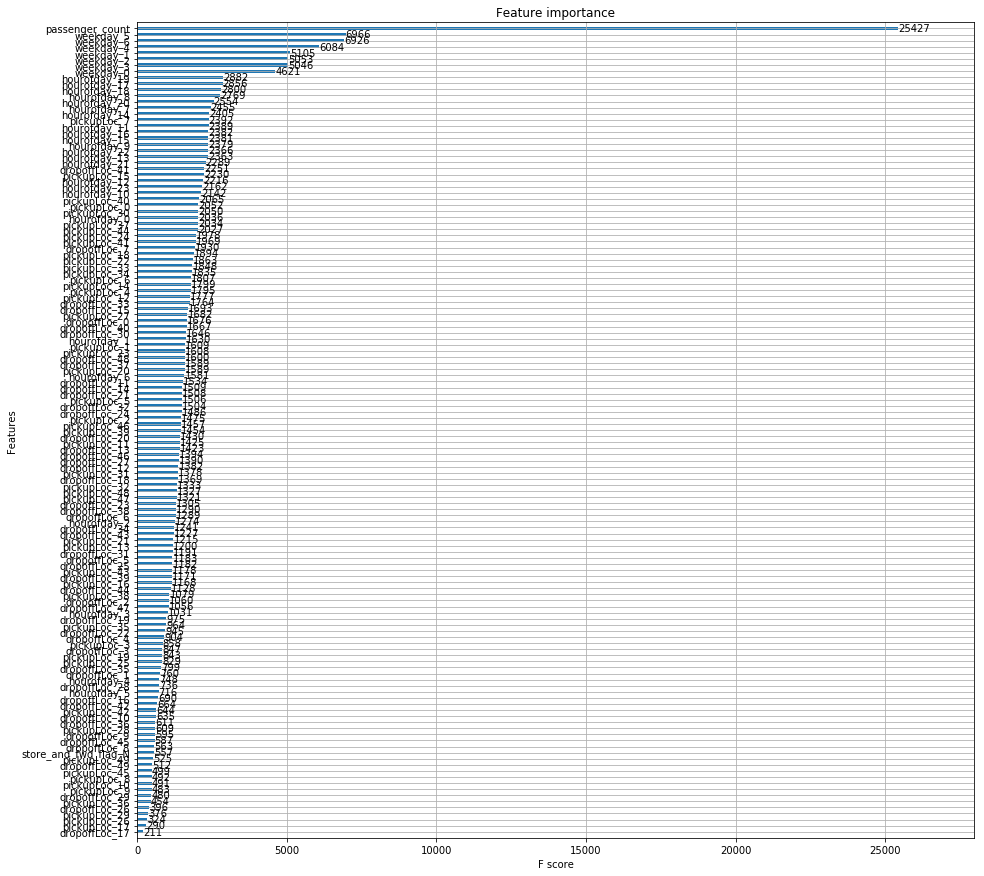

599669     4.343805
1224682    5.755742
78001      7.151485
990137     6.107023
498353     6.364751
165559     5.159055
1382058    5.111988
950885     5.973810
595547     6.388561
1197820    7.100852
765110     5.710427
545323     7.747597
1300798    6.827629
729145     6.070738
1101042    7.142037
25154      6.688355
877696     6.421622
616342     6.836259
138730     6.902743
1250350    6.706862
453424     6.302619
1224373    6.163315
1116068    6.629363
427057     7.198931
1380463    7.582738
435292     7.340836
1020697    6.511745
861206     6.523562
871805     6.672033
19872      6.068426
             ...   
532165     5.963579
430835     7.219642
332752     7.488294
854131     5.659482
956308     6.846943
924425     7.038784
1010509    7.061334
606745     4.927254
1304229    6.602588
887633     6.977281
745048     6.163315
370775     5.093750
674343     7.243513
949734     5.988961
541377     6.949856
604474     7.535830
839052     7.558517
1219160    6.932448
310744     6.857514


In [13]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(xgb_model_2,ax = axes,height =0.5)
plt.show();plt.close()

print Ztrain

I was quite suprised to see how important the "passenger_count" feature is , comparing to all the other features. Make me wondering, is that ture the "passenger_count" is important, or it is just because it is the only numerical feature in the training set and all the other feature are category type

Full set traing resulut with 
parms = {
         'objective':'reg:linear',
         'eta'      :0.01,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
         'max_depth':19,
         'min_child_weight':17,
         'gamma': 0.4} 
 and num_boost_round=2000, early_stopping_rounds=50, maximize=False
 
 
 # [1999]	train-rmse:0.476513	valid-rmse:0.485509

[0]	train-rmse:5.95842	valid-rmse:5.95846
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[100]	train-rmse:2.27012	valid-rmse:2.27007
[200]	train-rmse:1.02312	valid-rmse:1.02317
[300]	train-rmse:0.678088	valid-rmse:0.678736
[400]	train-rmse:0.597455	valid-rmse:0.598936
[500]	train-rmse:0.567941	valid-rmse:0.570246
[600]	train-rmse:0.55061	valid-rmse:0.553622
[700]	train-rmse:0.536039	valid-rmse:0.539777
[800]	train-rmse:0.52451	valid-rmse:0.528873
[900]	train-rmse:0.514712	valid-rmse:0.519679
[1000]	train-rmse:0.507735	valid-rmse:0.513265
[1100]	train-rmse:0.50092	valid-rmse:0.507008
[1200]	train-rmse:0.496142	valid-rmse:0.50272
[1300]	train-rmse:0.492182	valid-rmse:0.499201
[1400]	train-rmse:0.488872	valid-rmse:0.49634
[1500]	train-rmse:0.485938	valid-rmse:0.493805
[1600]	train-rmse:0.48349	valid-rmse:0.491749
[1700]	train-rmse:0.481664	valid-rmse:0.490268
[1800]	train-rmse:0.479716	valid-rmse:0.488624
[1900]	train-rmse:0.47799	valid-rmse:0.487222
[2000]	train-rmse:0.476578	valid-rmse:0.486082
[2100]	train-rmse:0.475279	valid-rmse:0.485052
[2200]	train-rmse:0.474194	valid-rmse:0.484222
[2300]	train-rmse:0.473183	valid-rmse:0.483442
[2400]	train-rmse:0.472411	valid-rmse:0.482902
[2500]	train-rmse:0.471692	valid-rmse:0.482386
[2600]	train-rmse:0.471081	valid-rmse:0.48197
[2700]	train-rmse:0.470523	valid-rmse:0.481603
[2800]	train-rmse:0.47004	valid-rmse:0.481302
[2900]	train-rmse:0.469605	valid-rmse:0.481063
[3000]	train-rmse:0.469208	valid-rmse:0.480847
[3100]	train-rmse:0.468847	valid-rmse:0.480677
[3200]	train-rmse:0.468541	valid-rmse:0.480531
[3300]	train-rmse:0.468252	valid-rmse:0.480404
[3400]	train-rmse:0.468006	valid-rmse:0.48032
[3500]	train-rmse:0.467767	valid-rmse:0.480238
[3600]	train-rmse:0.467553	valid-rmse:0.480173
[3700]	train-rmse:0.467354	valid-rmse:0.480136
[3800]	train-rmse:0.467162	valid-rmse:0.480102
[3900]	train-rmse:0.466984	valid-rmse:0.480083
[4000]	train-rmse:0.466815	valid-rmse:0.480054
[4100]	train-rmse:0.466668	valid-rmse:0.480035
Stopping. Best iteration:
[4120]	train-rmse:0.466638	valid-rmse:0.480032

# Feedforward Neural Network training 

In [7]:
model = MLPRegressor(early_stopping=True,alpha=0.01)
#scores4 = cross_val_score(model, X2, y, cv=4,scoring='neg_mean_squared_error',n_jobs=-1)

param_grid = [
 {'hidden_layer_sizes': [(100,300),(100,100),(100,100,100)]},
 ]

clf2 = GridSearchCV(model, param_grid, cv=2,scoring='neg_mean_squared_error',
                       n_jobs=-1,verbose=10)

clf2.fit(X,y)

clf2.cv_results_

{'mean_fit_time': array([410.24872994, 332.67073405, 348.35069239, 521.7891835 ,
        402.49975145]),
 'mean_score_time': array([3.44220853, 2.56609952, 6.34001148, 2.9485116 , 5.03074062]),
 'mean_test_score': array([-0.23911376, -0.24441152, -0.24107524, -0.23799285, -0.24287572]),
 'mean_train_score': array([-0.23787689, -0.243739  , -0.2398655 , -0.23673519, -0.2420613 ]),
 'param_hidden_layer_sizes': masked_array(data=[(30, 20), (10, 10, 10), (100, 30), (100, 100),
                    (10, 10, 100)],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (30, 20)},
  {'hidden_layer_sizes': (10, 10, 10)},
  {'hidden_layer_sizes': (100, 30)},
  {'hidden_layer_sizes': (100, 100)},
  {'hidden_layer_sizes': (10, 10, 100)}],
 'rank_test_score': array([2, 5, 3, 1, 4], dtype=int32),
 'split0_test_score': array([-0.23968489, -0.24251326, -0.24408334, -0.23857632, -0.24324786]),
 'split0_train_score':

In [11]:
nn_model = MLPRegressor(early_stopping=True,alpha=0.1,hidden_layer_sizes=(100,100),verbose=True)
nn_model.fit(X,y)

Iteration 1, loss = 0.24327789
Validation score: 0.621100
Iteration 2, loss = 0.13476278
Validation score: 0.617791
Iteration 3, loss = 0.13147092
Validation score: 0.613714
Iteration 4, loss = 0.13043591
Validation score: 0.631784
Iteration 5, loss = 0.13008978
Validation score: 0.631495
Iteration 6, loss = 0.12968021
Validation score: 0.627201
Iteration 7, loss = 0.12948493
Validation score: 0.630137
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

#save the model for prediction

In [19]:

#pickle.dump(model,open("model_Kaggle","wb"))

In [3]:
xgb_model_2.save_model("model_Kaggle")